## Assignment 05

Zachary W. Hopton

Notebook for assignment data visualization. 

In [1]:
import json

In [2]:
!pip install pandas
!pip install seaborn

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 14.9 MB/s eta 0:00:00 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.5 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [12]:
results = {}
for i,k in enumerate([1,5,10,15,20,25]):
    with open(f"./k_expts/{k}_eval.json") as eval:
        eval_dict = json.load(eval)
    print(eval_dict)
    results[i] = [k,eval_dict['score'],float(re.search(r"BP =\s(\d\.\d\d\d)\s",eval_dict['verbose_score']).group(1))]

{'name': 'BLEU', 'score': 17.4, 'signature': 'nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|version:2.4.3', 'verbose_score': '49.1/22.4/12.1/6.9 (BP = 1.000 ratio = 1.071 hyp_len = 4169 ref_len = 3892)', 'nrefs': '1', 'case': 'mixed', 'eff': 'no', 'tok': '13a', 'smooth': 'exp', 'version': '2.4.3'}
{'name': 'BLEU', 'score': 19.8, 'signature': 'nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|version:2.4.3', 'verbose_score': '60.1/29.4/17.6/10.9 (BP = 0.820 ratio = 0.835 hyp_len = 3249 ref_len = 3892)', 'nrefs': '1', 'case': 'mixed', 'eff': 'no', 'tok': '13a', 'smooth': 'exp', 'version': '2.4.3'}
{'name': 'BLEU', 'score': 19.0, 'signature': 'nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|version:2.4.3', 'verbose_score': '60.8/30.0/18.2/11.8 (BP = 0.758 ratio = 0.783 hyp_len = 3048 ref_len = 3892)', 'nrefs': '1', 'case': 'mixed', 'eff': 'no', 'tok': '13a', 'smooth': 'exp', 'version': '2.4.3'}
{'name': 'BLEU', 'score': 18.0, 'signature': 'nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|version:2.4.3

In [16]:
df = pd.DataFrame.from_dict(results,orient="index",columns=["k","BLEU","BP"])
df

,k,BLEU,BP
0,1,17.4,1.000
1,5,19.8,0.820
2,10,19.0,0.758
3,15,18.0,0.692
4,20,17.4,0.659
5,25,16.8,0.636


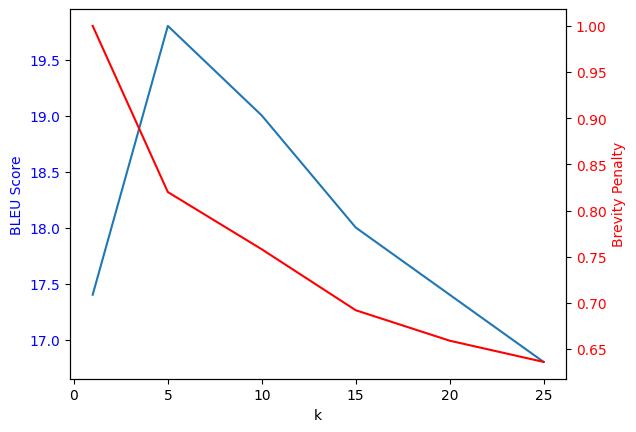

In [31]:
# Create the first plot
fig, ax1 = plt.subplots()

sns.lineplot(data=df, x='k', y='BLEU', ax=ax1, label='y1',legend = False)
ax1.set_ylabel('BLEU Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df, x='k', y='BP', color='red', ax=ax2, label='y2',legend=False)
ax2.set_ylabel('Brevity Penalty', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

Check the stop criteria experiments to analyze how many test samples' best translations change

In [5]:
with (open("./stop_expts/3_out_default.p.txt",'r',encoding='utf-8') as def_out,
      open("./stop_expts/3_out_constant.p.txt",'r',encoding="utf-8") as const_out,
      open("../../data/en-fr/raw/test.fr","r",encoding='utf-8') as fr_in):
    total = 0
    changed = 0
    changed_out = []
    for i,j,y in zip(def_out,const_out, fr_in):
        total+=1

        if i!=j:
            changed+=1
            changed_out.append((y,i,j))

print(changed/total)

0.328


In [6]:
changed_out

[('Il est plus grand que tous les autres garçons.\n',
  'He is taller than all others.\n',
  'He is more great than all the boys.\n'),
 ("J'aimerais que Jim se comporte bien.\n",
  "I'd like Jehovah because of them.\n",
  "I'd like Jehovah because you live.\n"),
 ('Je ne bois pas de vin.\n',
  "I don't need to see it.\n",
  "I don't need to vine.\n"),
 ('Tom est plus intelligent que moi.\n',
  'Tom is more intelligent.\n',
  'Tom is more intelligent than me.\n'),
 ('Il respecte ses principes.\n',
  'He respect his princes.\n',
  'He respect his prisoner.\n'),
 ('Les femmes aiment les parapluies de couleur.\n',
  'The woman like the speech.\n',
  'The woman like a lot of love.\n'),
 ('Il a décidé de louer sa propriété à cette société.\n',
  'He decided to leave his prophet.\n',
  'He decided to leave his prophecy.\n'),
 ("L'armée de Napoléon a marché jusqu'à Moscou.\n",
  'Let us Christ Jehovah said to Moses.\n',
  'Let us Christ Jehovah said to Moses:\n'),
 ('Ils ne vont pas durer si l

In [9]:
with (open("./stop_expts/3_out_default.p.txt",'r',encoding='utf-8') as def_out,
      open("./stop_expts/3_out_pruning.p.txt",'r',encoding="utf-8") as pru_out,
      open("../../data/en-fr/raw/test.fr","r",encoding='utf-8') as fr_in):
    total = 0
    changed = 0
    changed_out = []
    for i,j,y in zip(def_out,pru_out,fr_in):
        total+=1

        if i!=j:
            changed+=1
            changed_out.append((y,i,j))

print(changed/total)

0.004


In [10]:
changed_out

[('Tom ne savait pas comment réagir.\n',
  "Tom didn't know how to return.\n",
  "Tom didn't know how to try.\n"),
 ("Il est exact qu'elle enseigne le français à l'école.\n",
  'He is exactly than she is school.\n',
  "He is exactly that she doesn't school.\n")]

In [12]:
with (open("./stop_expts/3_out_constant.p.txt",'r',encoding='utf-8') as const_out,
      open("./stop_expts/3_out_pruning.p.txt",'r',encoding="utf-8") as pru_out,
      open("../../data/en-fr/raw/test.fr","r",encoding='utf-8') as fr_in):
    total = 0
    changed = 0
    changed_out = []
    for i,j,y in zip(const_out,pru_out,fr_in):
        total+=1

        if i!=j:
            changed+=1
            changed_out.append((y,i,j))

print(changed/total)

0.326


In [13]:
changed_out

[('Il est plus grand que tous les autres garçons.\n',
  'He is more great than all the boys.\n',
  'He is taller than all others.\n'),
 ("J'aimerais que Jim se comporte bien.\n",
  "I'd like Jehovah because you live.\n",
  "I'd like Jehovah because of them.\n"),
 ('Je ne bois pas de vin.\n',
  "I don't need to vine.\n",
  "I don't need to see it.\n"),
 ('Tom est plus intelligent que moi.\n',
  'Tom is more intelligent than me.\n',
  'Tom is more intelligent.\n'),
 ('Il respecte ses principes.\n',
  'He respect his prisoner.\n',
  'He respect his princes.\n'),
 ('Les femmes aiment les parapluies de couleur.\n',
  'The woman like a lot of love.\n',
  'The woman like the speech.\n'),
 ('Il a décidé de louer sa propriété à cette société.\n',
  'He decided to leave his prophecy.\n',
  'He decided to leave his prophet.\n'),
 ("L'armée de Napoléon a marché jusqu'à Moscou.\n",
  'Let us Christ Jehovah said to Moses:\n',
  'Let us Christ Jehovah said to Moses.\n'),
 ('Ils ne vont pas durer si l